In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("animasi.csv")

In [5]:
df.head(10)

,Penulis,Komentar
0,@bagusndog2218,Burik
1,@molli5758,"Film ini bagus kalau tayang di tahun 80, bukan..."
2,@anifah13,Intronya macam film krisna
3,@reza_imnida,bikin di capcut ya?
4,@MOXIZER,"Yaallah, sama upin ipin aja kalah jauh\nMalu b..."
5,@imamdenkhan5277,Katanya biayanya fantastis
6,@dimasprayogo5451,HAMA BUATAN INDIA
7,@valentinovincentx-4305,info nobar yg di sby mau ngguyu aku
8,@muhammadridwan3259,Jangan lupa bawa obat ttes mata
9,@Stumbleguys10847,Kok orang tua nya gak ikut cari bendera?


In [26]:
list_stopword = set(["yang", "di", "dan", "dari", "ke", "ini", "itu", "dengan", "untuk", "pada", "juga",
                     "saya", "dia", "mereka", "kita", "kami", "adalah", "ada", "saja", "sih", "kok", "deh",
                     "aja", "yg", "gak", "ga", "nggak", "kalo", "kalau", "biar", "banget", "emang", "nya",
                     "sangat", "sekali", "lebih", "kurang", "para", "para", "timnas", "indonesia"])

def bersihkan_teks(teks):
    if not isinstance(teks, str):
        return ""
    
    teks = teks.lower()
    teks = re.sub(r'[^a-zA-Z0-9\s]', '', teks)
    kata_kata = teks.split()
    kata_bersih = [kata for kata in kata_kata if kata not in list_stopword]
    return " ".join(kata_bersih)

df['Komentar_Bersih'] = df['Komentar'].apply(bersihkan_teks)

print("Perbandingan Komentar Asli dan Komentar Bersih:")
print(df[['Komentar', 'Komentar_Bersih']].head())

Perbandingan Komentar Asli dan Komentar Bersih:
                                            Komentar  \
0                                              Burik   
1  Film ini bagus kalau tayang di tahun 80, bukan...   
2                         Intronya macam film krisna   
3                               bikin di capcut ya?    
4  Yaallah, sama upin ipin aja kalah jauh\nMalu b...   

                               Komentar_Bersih  
0                                        burik  
1      film bagus tayang tahun 80 bukan hut 80  
2                   intronya macam film krisna  
3                              bikin capcut ya  
4  yaallah sama upin ipin kalah jauh malu sihh  


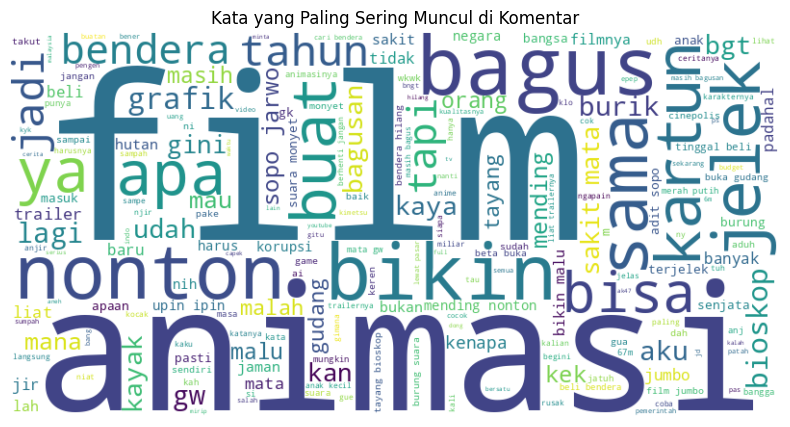

In [27]:
semua_komentar = " ".join(df['Komentar_Bersih'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(semua_komentar)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata yang Paling Sering Muncul di Komentar')
plt.show()

In [125]:
kata_positif = list(set([
    "sehat", "setuju", "kuat", "baik", "tulus", "naik", "wow", "support", 
    "dukung", "cinta", "bravo", "class", "keren", "hebat", "mantap", 
    "semangat", "terbaik", "juara", "luar biasa", "optimis", "good", "love", 
    "top", "salut", "berkelas", "percaya", "benar", "lebih", "lebih tau", 
    "dihati",
]))


kata_negatif_baru = list(set([
    "kecewa", "lemah", "buruk", "jelek", "payah", "parah", "tolong", "susah", "mending", "3gp", "patah", "wkw", "ha", "lawak", "kocak",
    "gagal", "hancur", "blunder", "mafia", "bosan", "bosen", "sakit mata", "duit", "sarcasm", "mata", "anj", "animasi", "mana", "ngucap",
    "malu", "menghujat", "jangan", "burik", "korupsi", "kaku", "bioskop", "jumbo", "bikin", "lebay", "takut", "resolusi", "damn", "korupsi"
    "tahun", "hati", "kejang", "sedih", "jumbo", "serius", "bagusan", "web", "jlk", "film", "jijik", "bit", "miliar", "adit", "sopo", "tertawa",
    "grafik", "kok", "system", "allah", "woilah", "bendera", "gudang", "senjata", "tembak", "blok", "negara", "indonesia"
    # Kata Negatif Tambahan
    'busuk', 'anjing', 'anjir', 'kontol', 'memek', 'bangsat', 'sampah', 'tolol', 'game', 'apaan'
    'goblok', 'bodoh', 'idiot', 'bacot', 'miskin', 'gembel', 'setan', 'babi', 'agak',
    'asu', 'kampret', 'ngentot', 'jembut', 'pepek', 'kimak', 'fuck', 'shit', 'wtf', 
    'ketinggalan', 'jaman', 'purba', 'memalukan', 'rusak', 'gila', 'sakit', 'stres', 
    'depresi', 'jeleknya', 'buriknya', 'kalah', 'cupu', 'nonton', 'buang', 'waktu', 'sumpah', 'boong'
    'rugi', 'nyesel', 'gaje', 'gak', 'jelas', 'absurd', 'aneh', 'asing', 'janggal', 'cok', 'grafik'
    'kasar', 'enggak', 'tak', 'bukan', 'salah', '80', 'monyet', '6,7', '6', '19', '80', 'suara', 'kon', 'sd',
]))


def analisis_sentimen(teks):
    skor_positif = 0
    skor_negatif = 0
    
    kata_kata = str(teks).lower().split()
    
    for kata in kata_kata:
        if kata in kata_positif:
            skor_positif += 1
        elif kata in kata_negatif_baru:
            skor_negatif += 1
            
    if skor_positif > skor_negatif:
        return 'Positif'
    elif skor_negatif > skor_positif:
        return 'Negatif'
    else:
        return 'Netral'

df['Sentimen'] = df['Komentar_Bersih'].apply(analisis_sentimen)

print("Contoh Hasil Analisis Sentimen (setelah perbaikan):")
# Mencetak contoh dari kolom 'Komentar' asli dan 'Sentimen' yang baru
print(df[['Komentar', 'Sentimen']].sample(10))

Contoh Hasil Analisis Sentimen (setelah perbaikan):
                                              Komentar Sentimen
753  kenapa ga kerja sama aja sm animator yg bagus-...  Negatif
65                           Benarkah ini 6 milyar????  Negatif
684                                                NaN   Netral
91   Film Indonesia kartun terjelek sepanjang masa ini  Negatif
141                                        hahahahahah   Netral
102  SERIUS TANYA... INI KOK MIRIP FILM UNYIL YO SE...  Negatif
415                     Matanya pada juling kenapa dah   Netral
586                        masih bagus adit sopo jarwo  Negatif
158                             0:38 Markas kartel wak   Netral
350  Mau bersaing sama kimetsu no yaiba, wkwk untuk...  Negatif



Distribusi Sentimen:
Sentimen
Negatif    571
Netral     326
Positif     11
Name: count, dtype: int64


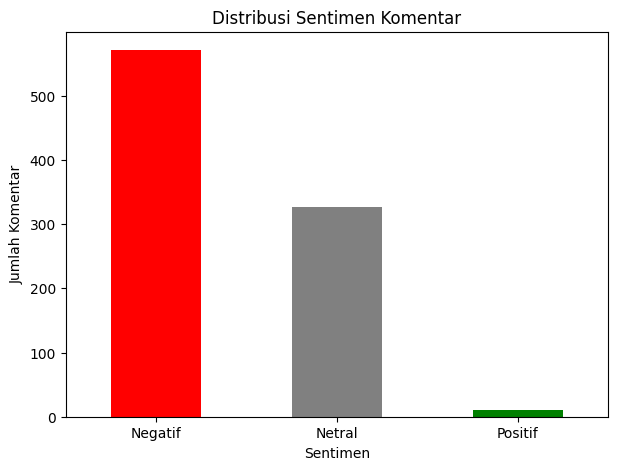

In [126]:
distribusi_sentimen = df['Sentimen'].value_counts()

print("\nDistribusi Sentimen:")
print(distribusi_sentimen)

plt.figure(figsize=(7, 5))
distribusi_sentimen.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Distribusi Sentimen Komentar')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=0)
plt.show()